In [1]:
import pandas as pd
import numpy as np

In [2]:
fake_df = pd.read_csv(r"h:\Desktop\BI Projet\FakeNews.csv")
real_df = pd.read_csv(r"h:\Desktop\BI Projet\RealNews.csv")
fake_df['Category'] = "False"
real_df['Category'] = "True"
fake_df.head()
real_df.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [3]:
df = pd.concat([fake_df, real_df], axis=0)
df.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


In [4]:
df.sample(5)

,title,text,subject,date,Category
5501,WATCH: Racist Republican Congressman Steve Ki...,It doesn t get any clearer than this that Iowa...,News,"July 12, 2016",False
11770,May will allow Brexit delay in exceptional cir...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"December 20, 2017",True
3872,Senate votes to confirm Gottlieb as head of FDA,(Reuters) - The U.S. Senate voted on Tuesday t...,politicsNews,"May 9, 2017",True
11654,Australian police say car that hit pedestrians...,SYDNEY (Reuters) - A car was deliberately driv...,worldnews,"December 21, 2017",True
15663,Saudi Finance Ministry says crackdown preserve...,RIYADH (Reuters) - Saudi Arabia s Finance Mini...,worldnews,"November 5, 2017",True


In [5]:
fake_df.shape

(23481, 5)

In [6]:
real_df.shape

(21417, 5)

In [7]:
df.shape

(44898, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   Category  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [9]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

In [10]:
df.describe(include='all')

,title,text,subject,date,Category
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",False
freq,14,627,11272,182,23481


In [11]:
df = df.drop_duplicates(subset=['text'], keep="last")


In [12]:
df.to_csv(r"h:\Desktop\BI Projet\news.csv")

In [13]:
df.describe()


,title,text,subject,date,Category
count,38646,38646,38646,38646,38646
unique,38270,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,Donald Trump just couldn t wish all Americans ...,politicsNews,"December 6, 2017",True
freq,14,1,11203,166,21192


In [14]:
import scipy
from scipy.sparse import issparse

In [15]:
# Splitting the Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],df['Category'], test_size = 0.25, random_state = 100)

In [16]:
display(X_train.head())
display(Y_train.head())
len(X_train)

20942    LONDON (Reuters) - A row over how much money B...
10735    Hillary Clinton continues on the path to compl...
16368    TORONTO (Reuters) - A regional Latin American ...
18689    Johnny Carson must be rolling over in his grav...
18942    FORMER CONSERVATIVE darling Tomi Lahren made a...
Name: text, dtype: object

20942     True
10735    False
16368     True
18689    False
18942    False
Name: Category, dtype: object

28984

In [17]:
# TF-IDF Vectorizer
import nltk
nltk.download('punkt')
from nltk import word_tokenize

df['text'] = df['text'].apply(lambda x: word_tokenize(str(x)))

[nltk_data] Downloading package punkt to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
from nltk.stem import SnowballStemmer

snowball = SnowballStemmer(language='english')
df['text'] = df['text'].apply(lambda x: [snowball.stem(y) for y in x])

In [19]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [20]:
from nltk.corpus import stopwords 

nltk.download('words')
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package words to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CYTech
[nltk_data]     Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['text'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_text, df['Category'], test_size=0.30, random_state=1)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

scores = {}
clf2 = MultinomialNB()
clf2.fit(X_train, Y_train)

y_pred_MNB = clf2.predict(X_test)
print(cross_val_score(clf2, X_text, df['Category'], cv=3))
print(accuracy_score(y_pred_MNB, Y_test))

scores['MultinomialNB'] = accuracy_score(y_pred_MNB, Y_test)

[0.93727682 0.89970501 0.8733116 ]
0.9417802311540452


In [24]:
#Confusion matrix
conf_mat = confusion_matrix(Y_test,y_pred_MNB)
conf_mat

array([[4752,  513],
       [ 162, 6167]], dtype=int64)

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

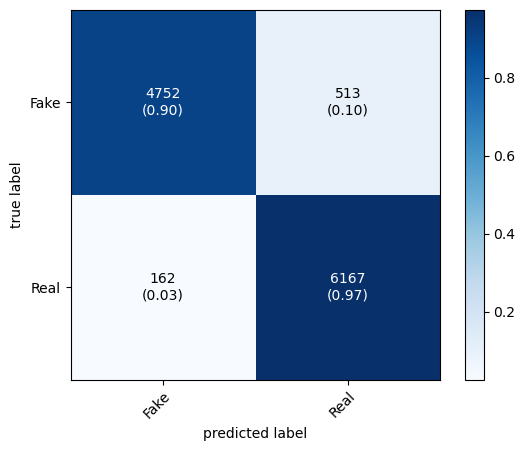

In [25]:
# plotting the confusion matrix

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat, show_normed=True, colorbar=True, class_names=['Fake', 'Real'])

In [26]:
#Classification report

print(classification_report(Y_test, y_pred_MNB))

              precision    recall  f1-score   support

       False       0.97      0.90      0.93      5265
        True       0.92      0.97      0.95      6329

    accuracy                           0.94     11594
   macro avg       0.95      0.94      0.94     11594
weighted avg       0.94      0.94      0.94     11594

